# AVL Trees

n=    1000 | insert=0.000015680s | lookup=0.000001238s | delete=0.000011232s
n=   10000 | insert=0.000019712s | lookup=0.000002322s | delete=0.000017706s
n=  100000 | insert=0.000028555s | lookup=0.000003764s | delete=0.000022861s
n= 1000000 | insert=0.000042141s | lookup=0.000006727s | delete=0.000034306s
n=10000000 | insert=0.000103489s | lookup=0.000008965s | delete=0.000037850s


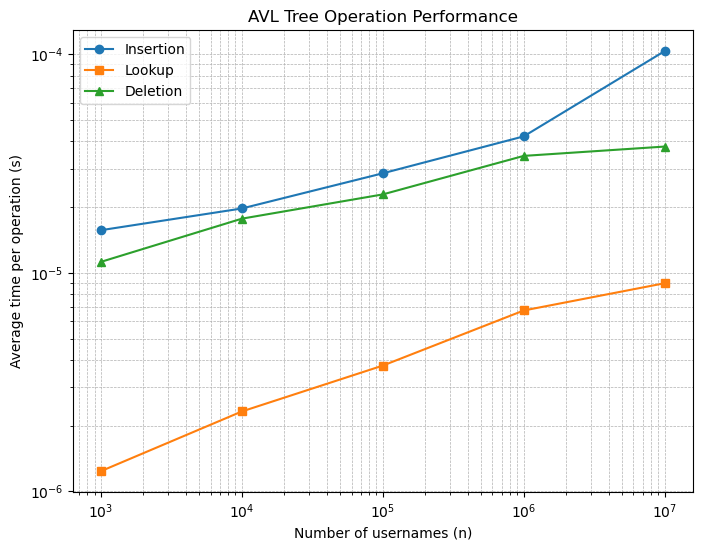

In [ ]:
import random
import string
import time
import matplotlib.pyplot as plt

# ---- reproducibility ----
random.seed(42)

# ---- character set for random usernames ----
CHARS = string.ascii_lowercase + string.digits

# ---- dataset sizes ----
n_list_avl = [10**3, 10**4, 10**5, 10**6, 10**7]  # increase later if desired
times_insert_avl = []
times_lookup_avl = []
times_delete_avl = []

# ---- import your AVL tree class (or paste it here) ----
# from avl_tree import AVLTree  # later use this when in separate files

# AVLTree implementation
class AVLNode:
    """Node of an AVL Tree"""
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Height of a leaf node is 1

class AVLTree:
    """AVL Tree implementation with insert, delete, search, and traversals."""
    def __init__(self):
        self.root = None

    # Utility functions
    def _height(self, node):
        """Return the height of a node."""
        return node.height if node else 0

    def _update_height(self, node):
        """Recalculate height based on children."""
        node.height = 1 + max(self._height(node.left), self._height(node.right))

    def _balance_factor(self, node):
        """Compute the balance factor = left_height - right_height."""
        return self._height(node.left) - self._height(node.right) if node else 0

    def _min_node(self, node):
        """Return node with smallest key (used in deletion)."""
        while node.left:
            node = node.left
        return node

    # Rotations (O(1))
    def _right_rotate(self, y):
        """
        Perform a right rotation around node y.
                y                x
               / \              / \
              x   T3   -->     T1  y
             / \                  / \
            T1  T2               T2  T3
        """
        x = y.left
        T2 = x.right

        # Perform rotation
        x.right = y
        y.left = T2

        # Update heights
        self._update_height(y)
        self._update_height(x)

        return x  # New root of subtree

    def _left_rotate(self, x):
        """
        Perform a left rotation around node x.
            x                     y
           / \                   / \
          T1  y      -->        x  T3
             / \               / \
            T2  T3            T1  T2
        """
        y = x.right
        T2 = y.left

        # Perform rotation
        y.left = x
        x.right = T2

        # Update heights
        self._update_height(x)
        self._update_height(y)

        return y  # New root of subtree

    # Rebalancing
    def _rebalance(self, node):
        """Rebalance a node if it's unbalanced (balance factor < -1 or > 1)."""
        self._update_height(node)
        bf = self._balance_factor(node)

        # Left heavy
        if bf > 1:
            # Left-Right case
            if self._balance_factor(node.left) < 0:
                node.left = self._left_rotate(node.left)
            # Left-Left case
            return self._right_rotate(node)

        # Right heavy
        if bf < -1:
            # Right-Left case
            if self._balance_factor(node.right) > 0:
                node.right = self._right_rotate(node.right)
            # Right-Right case
            return self._left_rotate(node)

        return node  # No imbalance

    # Insert (O(log n))
    def _insert(self, node, key, value=None):
        """Recursive helper to insert a key and rebalance."""
        if not node:
            return AVLNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
        else:
            # Duplicate key — update value (with new one)
            node.value = value
            return node

        return self._rebalance(node)

    def insert(self, key, value=None): # recursive
        """Public method to insert a key-value pair."""
        self.root = self._insert(self.root, key, value)

    # Search (O(log n))
    def search(self, key):
        """Return the value for the given key, or None if not found."""
        node = self.root
        while node:
            if key == node.key:
                return node.value if node.value is not None else node.key
            node = node.left if key < node.key else node.right
        return None

    # Delete (O(log n))
    def _delete(self, node, key):
        """Recursive helper to delete a key and rebalance."""
        if not node:
            return None

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            # Node to delete found
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            else:
                # Node has two children: find inorder successor
                succ = self._min_node(node.right)
                node.key, node.value = succ.key, succ.value
                node.right = self._delete(node.right, succ.key)

        return self._rebalance(node) if node else None

    def delete(self, key):
        """Public method to delete a key."""
        self.root = self._delete(self.root, key)

    # Some extra functions not necessary for the main operations but may be useful
    # Traversals (O(n))
    def inorder(self):
        """Return in-order traversal as a list of (key, value)."""
        res = []
        def _in(node):
            if not node:
                return
            _in(node.left)
            res.append((node.key, node.value))
            _in(node.right)
        _in(self.root)
        return res

    def preorder(self):
        """Return pre-order traversal as a list of (key, value)."""
        res = []
        def _pre(node):
            if not node:
                return
            res.append((node.key, node.value))
            _pre(node.left)
            _pre(node.right)
        _pre(self.root)
        return res

    def postorder(self):
        """Return post-order traversal as a list of (key, value)."""
        res = []
        def _post(node):
            if not node:
                return
            _post(node.left)
            _post(node.right)
            res.append((node.key, node.value))
        _post(self.root)
        return res

    # Pretty-print (for debugging small trees)
    def _str(self, node, level=0, pref="Root: "):
        """Helper to print the tree structure."""
        if not node:
            return ""
        s = " " * (level * 4) + f"{pref}{node.key}(h={node.height})\n"
        s += self._str(node.left, level+1, "L--- ")
        s += self._str(node.right, level+1, "R--- ")
        return s

    def __str__(self):
        """String representation of the entire tree."""
        return self._str(self.root) or "<empty tree>"

def random_usernames(n, length=6):
    """Generate n random usernames of given length."""
    return [''.join(random.choice(CHARS) for _ in range(length)) + str(i) for i in range(n)]

# Performing the actual operations
for n in n_list_avl:
    usernames = random_usernames(n)
    lookup_count = min(1000, n // 2) # The Lookup count was kept constant at 1000

    # Insertions
    tree = AVLTree()
    start = time.perf_counter_ns()
    for name in usernames:
        tree.insert(name)
    insert_time = (time.perf_counter_ns() - start) / n / 1e9  # average time per insert
    times_insert_avl.append(insert_time)

    # Lookups 
    lookup_names = random.sample(usernames, lookup_count)
    # add some negative lookups too (i.e. some usernames that aren't present in )
    lookup_names += [''.join(random.choice(CHARS) for _ in range(6)) for _ in range(lookup_count)]

    start = time.perf_counter_ns()
    for name in lookup_names: # Looking through lookup names 
        tree.search(name)
    lookup_time = (time.perf_counter_ns() - start) / len(lookup_names) / 1e9
    times_lookup_avl.append(lookup_time)

    # Deletions
    delete_names = random.sample(usernames, lookup_count) # Number of Deletions is the same as lookups for consistency
    start = time.perf_counter_ns() # Timing
    for name in delete_names:
        tree.delete(name)
    delete_time = (time.perf_counter_ns() - start) / len(delete_names) / 1e9
    times_delete_avl.append(delete_time)

    print(f"n={n:>8} | insert={insert_time:.9f}s | lookup={lookup_time:.9f}s | delete={delete_time:.9f}s")

# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_avl, times_insert_avl, 'o-', label='Insertion')
plt.plot(n_list_avl, times_lookup_avl, 's-', label='Lookup')
plt.plot(n_list_avl, times_delete_avl, '^-', label='Deletion')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per operation (s)")
plt.title("AVL Tree Operation Performance")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Red-Black Tree

n=    1000 | insert=0.000003326s | lookup=0.000001204s | delete=0.000002712s
n=   10000 | insert=0.000003102s | lookup=0.000001469s | delete=0.000002402s
n=  100000 | insert=0.000004448s | lookup=0.000003358s | delete=0.000005090s
n= 1000000 | insert=0.000006437s | lookup=0.000004569s | delete=0.000006033s
n=10000000 | insert=0.000021216s | lookup=0.000007733s | delete=0.000009622s


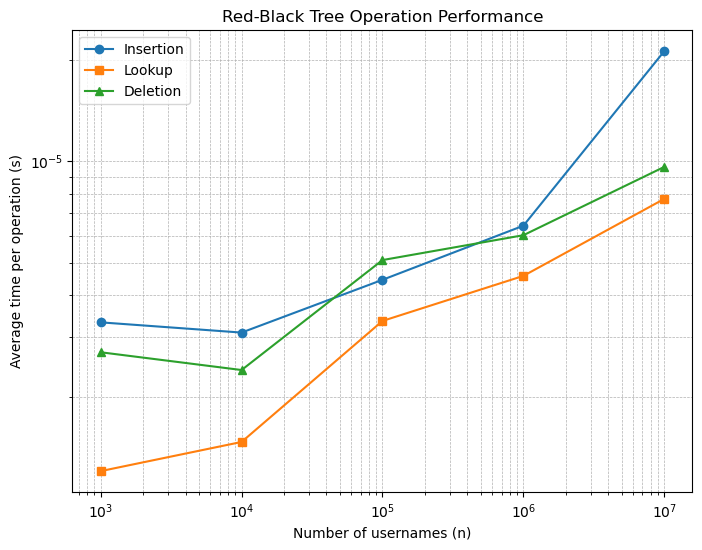

In [2]:
import random
import string
import time
import matplotlib.pyplot as plt

# ---------- reproducibility ----------
random.seed(42)

# ---------- character set ----------
CHARS = string.ascii_lowercase + string.digits

# ---------- dataset sizes ----------
n_list_rbt = [10**3, 10**4, 10**5, 10**6, 10**7]  # can scale higher later
times_insert_rbt = []
times_lookup_rbt = []
times_delete_rbt = []

# ---- RED-BLACK TREE IMPLEMENTATION ----
class RBNode:
    def __init__(self, key):
        self.key = key
        self.color = 'red'  # new nodes start red
        self.left = None
        self.right = None
        self.parent = None

class RBTree:
    """Red-Black Tree implementation with insertion, deletion, search, and black-height validation."""
    def __init__(self):
        self.NIL = RBNode(None)
        self.NIL.color = 'black'
        self.root = self.NIL

    # ---- Utility functions ----
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x

    # ---- Insertion ----
    def insert(self, key):
        node = RBNode(key)
        node.left = node.right = self.NIL

        parent = None
        current = self.root
        while current != self.NIL:
            parent = current
            if node.key < current.key:
                current = current.left
            elif node.key > current.key:
                current = current.right
            else:
                return  # ignore duplicates

        node.parent = parent
        if parent is None:
            self.root = node
        elif node.key < parent.key:
            parent.left = node
        else:
            parent.right = node

        self._fix_insert(node)

    def _fix_insert(self, z):
        while z.parent and z.parent.color == 'red':
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y.color == 'red':  # Case 1
                    z.parent.color = y.color = 'black'
                    z.parent.parent.color = 'red'
                    z = z.parent.parent
                else:
                    if z == z.parent.right:  # Case 2
                        z = z.parent
                        self.left_rotate(z)
                    z.parent.color = 'black'  # Case 3
                    z.parent.parent.color = 'red'
                    self.right_rotate(z.parent.parent)
            else:  # mirror case
                y = z.parent.parent.left
                if y.color == 'red':
                    z.parent.color = y.color = 'black'
                    z.parent.parent.color = 'red'
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.right_rotate(z)
                    z.parent.color = 'black'
                    z.parent.parent.color = 'red'
                    self.left_rotate(z.parent.parent)
        self.root.color = 'black'

    # ---- Search ----
    def search(self, key):
        node = self.root
        while node != self.NIL and node.key != key:
            if key < node.key:
                node = node.left
            else:
                node = node.right
        return node != self.NIL

    # ---- Deletion ----
    def _transplant(self, u, v):
        if u.parent is None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def _minimum(self, node):
        while node.left != self.NIL:
            node = node.left
        return node

    def delete(self, key):
        z = self.root
        while z != self.NIL and z.key != key:
            if key < z.key:
                z = z.left
            else:
                z = z.right
        if z == self.NIL:
            return  # not found

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self._transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self._transplant(z, z.left)
        else:
            y = self._minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self._transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self._transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 'black':
            self._fix_delete(x)

    def _fix_delete(self, x):
        while x != self.root and x.color == 'black':
            if x == x.parent.left:
                w = x.parent.right
                if w.color == 'red':
                    w.color = 'black'
                    x.parent.color = 'red'
                    self.left_rotate(x.parent)
                    w = x.parent.right
                if w.left.color == w.right.color == 'black':
                    w.color = 'red'
                    x = x.parent
                else:
                    if w.right.color == 'black':
                        w.left.color = 'black'
                        w.color = 'red'
                        self.right_rotate(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = w.right.color = 'black'
                    self.left_rotate(x.parent)
                    x = self.root
            else:  # mirror case
                w = x.parent.left
                if w.color == 'red':
                    w.color = 'black'
                    x.parent.color = 'red'
                    self.right_rotate(x.parent)
                    w = x.parent.left
                if w.left.color == w.right.color == 'black':
                    w.color = 'red'
                    x = x.parent
                else:
                    if w.left.color == 'black':
                        w.right.color = 'black'
                        w.color = 'red'
                        self.left_rotate(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = w.left.color = 'black'
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = 'black'

    # ---- Validation ----
    def validate_black_height(self):
        """Returns True if all root-to-leaf paths have same number of black nodes."""
        def dfs(node):
            if node == self.NIL:
                return 1  # count NIL as black leaf
            left = dfs(node.left)
            right = dfs(node.right)
            if left == 0 or right == 0 or left != right:
                return 0
            return left + (1 if node.color == 'black' else 0)
        return dfs(self.root) > 0

#   PERFORMANCE EXPERIMENT
def random_usernames(n, length=6):
    """Generate n random usernames."""
    return [''.join(random.choice(CHARS) for _ in range(length)) + str(i) for i in range(n)]

for n in n_list_rbt:
    usernames = random_usernames(n)
    lookup_count = min(1000, n // 2)

    # ---------- insertion ----------
    tree = RBTree()
    start = time.perf_counter_ns()
    for name in usernames:
        tree.insert(name)
    insert_time = (time.perf_counter_ns() - start) / n / 1e9
    times_insert_rbt.append(insert_time)

    # ---------- lookup ----------
    lookup_names = random.sample(usernames, lookup_count)
    lookup_names += [''.join(random.choice(CHARS) for _ in range(6)) for _ in range(lookup_count)]

    start = time.perf_counter_ns()
    for name in lookup_names:
        tree.search(name)
    lookup_time = (time.perf_counter_ns() - start) / len(lookup_names) / 1e9
    times_lookup_rbt.append(lookup_time)

    # ---------- deletion ----------
    delete_names = random.sample(usernames, lookup_count)
    start = time.perf_counter_ns()
    for name in delete_names:
        tree.delete(name)
    delete_time = (time.perf_counter_ns() - start) / len(delete_names) / 1e9
    times_delete_rbt.append(delete_time)

    print(f"n={n:>8} | insert={insert_time:.9f}s | lookup={lookup_time:.9f}s | delete={delete_time:.9f}s")

#   PLOT RESULTS
plt.figure(figsize=(8,6))
plt.plot(n_list_rbt, times_insert_rbt, 'o-', label='Insertion')
plt.plot(n_list_rbt, times_lookup_rbt, 's-', label='Lookup')
plt.plot(n_list_rbt, times_delete_rbt, '^-', label='Deletion')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per operation (s)")
plt.title("Red-Black Tree Operation Performance")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


# Treap

n=    1000 | insert=0.000003865s | lookup=0.000001726s | delete=0.000002272s
n=   10000 | insert=0.000004310s | lookup=0.000002441s | delete=0.000003404s
n=  100000 | insert=0.000006335s | lookup=0.000004529s | delete=0.000005222s
n= 1000000 | insert=0.000011434s | lookup=0.000007725s | delete=0.000009052s
n=10000000 | insert=0.000101237s | lookup=0.000016696s | delete=0.000018350s


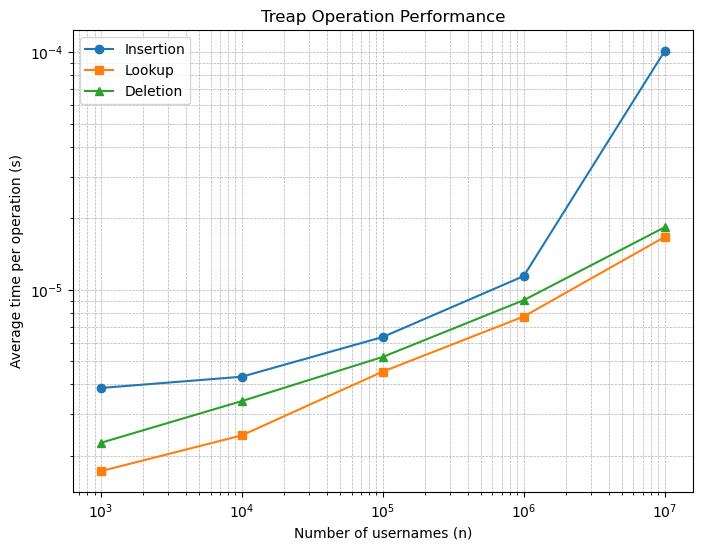

In [3]:
import random
import string
import time
import matplotlib.pyplot as plt

class TreapNode:
    def __init__(self, key, priority=None):
        self.key = key
        self.priority = priority if priority is not None else random.random()
        self.left = None
        self.right = None

class Treap:
    """Treap (Tree + Heap) with insert, search, delete, and rotations."""
    def __init__(self):
        self.root = None

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        return x

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        return y

    def insert(self, root, key):
        if not root:
            return TreapNode(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
            if root.left.priority > root.priority:
                root = self.rotate_right(root)
        elif key > root.key:
            root.right = self.insert(root.right, key)
            if root.right.priority > root.priority:
                root = self.rotate_left(root)
        return root

    def search(self, root, key):
        if not root:
            return False
        if key == root.key:
            return True
        elif key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)

    def delete(self, root, key):
        if not root:
            return None
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            if root.left.priority < root.right.priority:
                root = self.rotate_left(root)
                root.left = self.delete(root.left, key)
            else:
                root = self.rotate_right(root)
                root.right = self.delete(root.right, key)
        return root

    # Wrapper methods for easy usage like other trees
    def insert_key(self, key):
        self.root = self.insert(self.root, key)

    def search_key(self, key):
        return self.search(self.root, key)

    def delete_key(self, key):
        self.root = self.delete(self.root, key)

# ---- reproducibility ----
random.seed(42)

# ---- character set for random usernames ----
CHARS = string.ascii_lowercase + string.digits

# ---- dataset sizes ----
n_list_treap = [10**3, 10**4, 10**5, 10**6, 10**7]  # increase later if desired
times_insert_treap = []
times_lookup_treap = []
times_delete_treap = []

def random_usernames(n, length=6):
    """Generate n random usernames of given length."""
    return [''.join(random.choice(CHARS) for _ in range(length)) + str(i) for i in range(n)]

# ---- experiment ----
for n in n_list_avl:
    usernames = random_usernames(n)
    lookup_count = min(1000, n // 2)

    # ---------- insertion timing ----------
    tree = Treap()
    start = time.perf_counter_ns()
    for name in usernames:
        tree.insert_key(name)
    insert_time = (time.perf_counter_ns() - start) / n / 1e9  # average time per insert
    times_insert_treap.append(insert_time)

    # ---------- lookup timing ----------
    lookup_names = random.sample(usernames, lookup_count)
    # add some negative lookups too
    lookup_names += [''.join(random.choice(CHARS) for _ in range(6)) for _ in range(lookup_count)]

    start = time.perf_counter_ns()
    for name in lookup_names:
        tree.search_key(name)
    lookup_time = (time.perf_counter_ns() - start) / len(lookup_names) / 1e9
    times_lookup_treap.append(lookup_time)

    # ---------- deletion timing ----------
    delete_names = random.sample(usernames, lookup_count)
    start = time.perf_counter_ns()
    for name in delete_names:
        tree.delete_key(name)
    delete_time = (time.perf_counter_ns() - start) / len(delete_names) / 1e9
    times_delete_treap.append(delete_time)

    print(f"n={n:>8} | insert={insert_time:.9f}s | lookup={lookup_time:.9f}s | delete={delete_time:.9f}s")

# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_treap, times_insert_treap, 'o-', label='Insertion')
plt.plot(n_list_treap, times_lookup_treap, 's-', label='Lookup')
plt.plot(n_list_treap, times_delete_treap, '^-', label='Deletion')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per operation (s)")
plt.title("Treap Operation Performance")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Comparison Plots

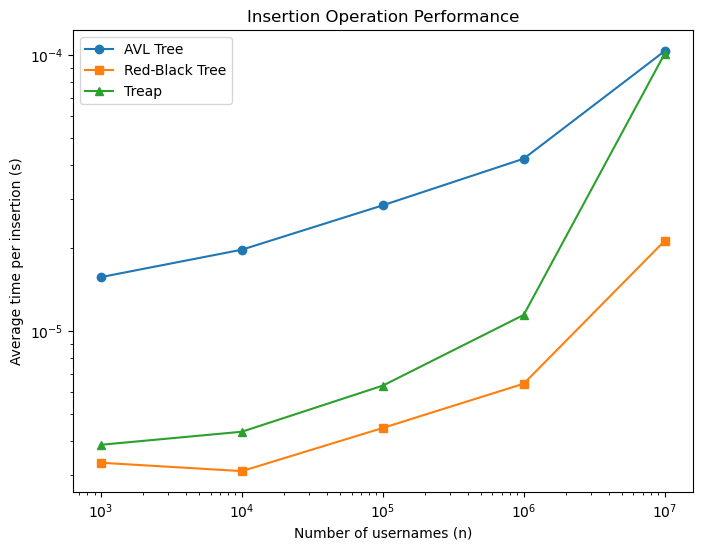

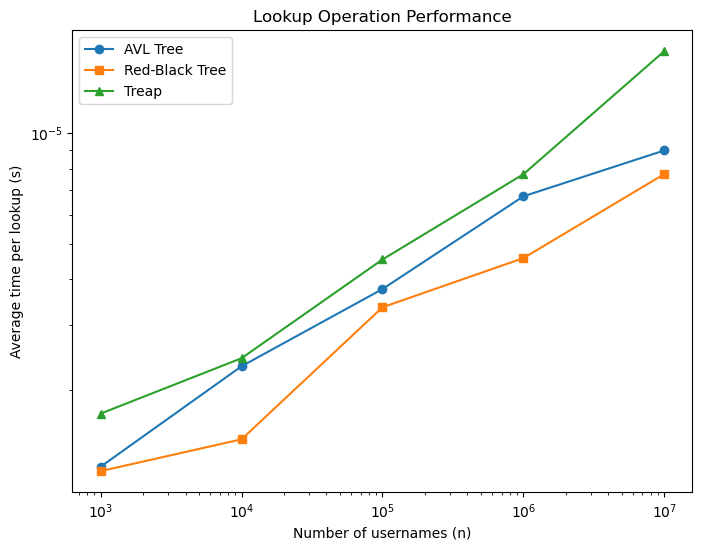

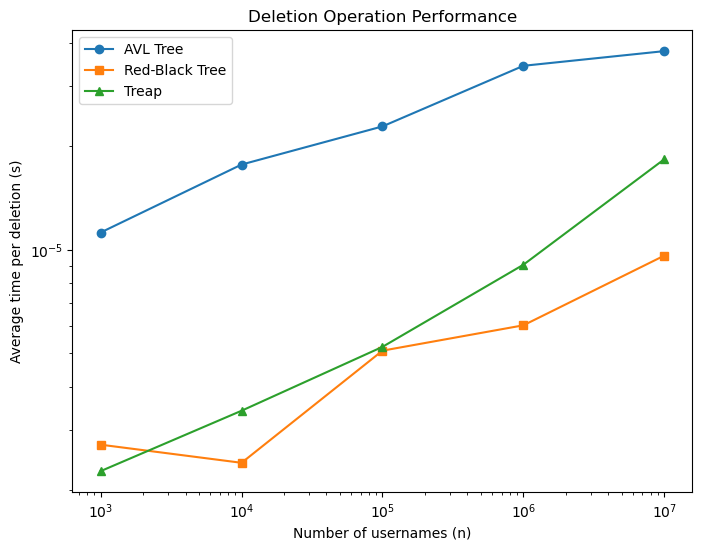

In [7]:
# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_treap, times_insert_avl, 'o-', label='AVL Tree')
plt.plot(n_list_treap, times_insert_rbt, 's-', label='Red-Black Tree')
plt.plot(n_list_treap, times_insert_treap, '^-', label='Treap')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per insertion (s)")
plt.title("Insertion Operation Performance")
plt.legend()
plt.grid(False)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_treap, times_lookup_avl, 'o-', label='AVL Tree')
plt.plot(n_list_treap, times_lookup_rbt, 's-', label='Red-Black Tree')
plt.plot(n_list_treap, times_lookup_treap, '^-', label='Treap')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per lookup (s)")
plt.title("Lookup Operation Performance")
plt.legend()
plt.grid(False)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# ---- plot results ----
plt.figure(figsize=(8,6))
plt.plot(n_list_treap, times_delete_avl, 'o-', label='AVL Tree')
plt.plot(n_list_treap, times_delete_rbt, 's-', label='Red-Black Tree')
plt.plot(n_list_treap, times_delete_treap, '^-', label='Treap')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average time per deletion (s)")
plt.title("Deletion Operation Performance")
plt.legend()
plt.grid(False)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()